# Deep Learning : Assignment 3

# Name : Manas Chopra

### Importing classes and functions neeeded

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import backend as k
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf
from sklearn.model_selection import train_test_split
k.set_image_dim_ordering('th')

### Loading Training Datasets

In [3]:
with open("trainX.pickle","rb") as f:
    x_data=pickle.load(f)
with open("trainY.pickle","rb") as f:
    y_data=pickle.load(f)

In [4]:
x_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
set(y_data)
# num of classes=10

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
y_data

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Showing data in the datasets

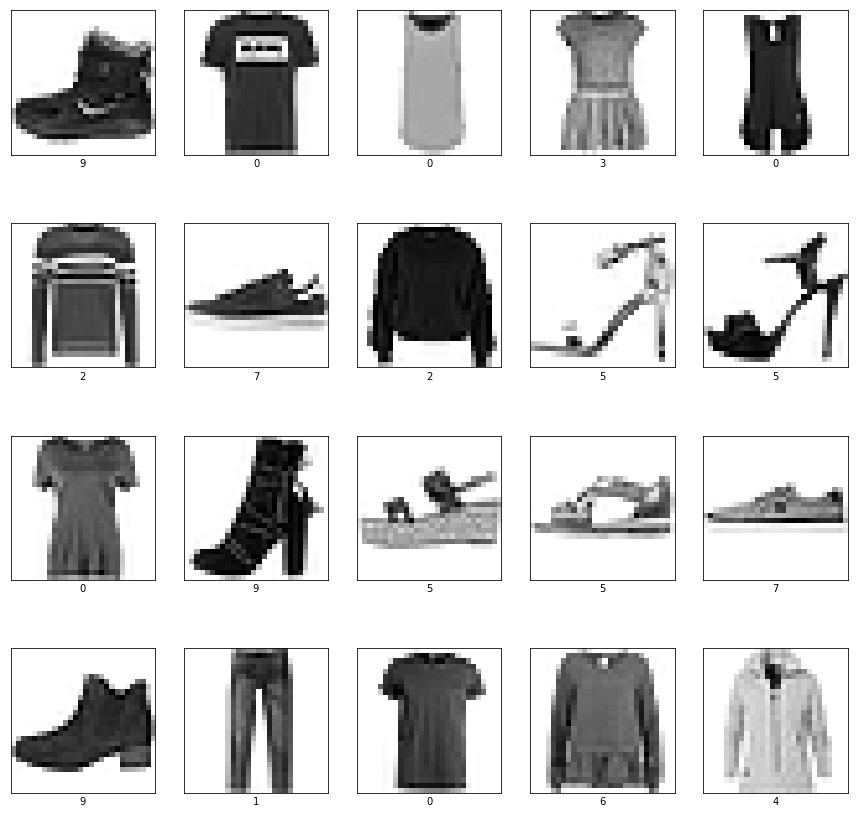

In [7]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_data[i], cmap=plt.cm.binary)
    plt.xlabel(y_data[i])
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

### Splitting into train and test sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=1)

In [9]:
x_train.shape

(40200, 28, 28)

In [10]:
y_train.shape

(40200,)

In [11]:
x_test.shape

(19800, 28, 28)

x_train=x_train.reshape((40200,784))
x_test=x_test.reshape((19800,784))

In [12]:
from keras import backend as k
k.image_data_format()

'channels_first'

In [13]:
batch_size= 128  #no. of samples
num_classes=10
epochs=20

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (40200, 28, 28)
40200 train samples
19800 test samples


In [15]:
x_train = np.reshape(x_train, (40200, 784))
x_test = np.reshape(x_test, (19800, 784))

In [16]:
model = Sequential()
model.add(Dense(500, input_dim=784), )
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/20
40200/40200 [==============================] - 14s 339us/step - loss: 0.6131 - acc: 0.7786 - val_loss: 0.7344 - val_acc: 0.7310
Epoch 2/20
40200/40200 [==============================] - 13s 327us/step - loss: 0.4163 - acc: 0.8475 - val_loss: 0.5034 - val_acc: 0.8066
Epoch 3/20
40200/40200 [==============================] - 12s 311us/step - loss: 0.3657 - acc: 0.8641 - val_loss: 0.6048 - val_acc: 0.8130
Epoch 4/20
40200/40200 [==============================] - 12s 306us/step - loss: 0.3354 - acc: 0.8744 - val_loss: 0.7566 - val_acc: 0.7643
Epoch 5/20
40200/40200 [==============================] - 12s 308us/step - loss: 0.3117 - acc: 0.8837 - val_loss: 0.7235 - val_acc: 0.7798
Epoch 6/20
40200/40200 [==============================] - 13s 312us/step - loss: 0.2945 - acc: 0.8908 - val_loss: 0.3692 - val_acc: 0.8565
Epoch 7/20
40200/40200 [==============================] - 14s 346us/step - loss: 0.2762 - acc: 0.8960 - val_loss: 0.

### Accuracy in the above model is = 89.22%

### Splitting dataset into test and train [Reassigning values]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=1)

In [53]:
# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

x_train = x_train / 255
x_test = x_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### METHOD - SIMPLE CONVOLUTIONAL FOR NEURAL NETWORK [10 epochs]

In [59]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
#x_train = x_train.reshape(-1,28, 28, 1)   
#x_test = x_test.reshape(-1,28, 28, 1)

In [61]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',scores[0])
print('Test accuracy:', scores[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/10
 - 158s - loss: 0.5730 - acc: 0.7945 - val_loss: 0.3899 - val_acc: 0.8644
Epoch 2/10
 - 163s - loss: 0.3700 - acc: 0.8701 - val_loss: 0.3472 - val_acc: 0.8782
Epoch 3/10
 - 165s - loss: 0.3245 - acc: 0.8861 - val_loss: 0.3154 - val_acc: 0.8890
Epoch 4/10
 - 160s - loss: 0.2995 - acc: 0.8927 - val_loss: 0.2965 - val_acc: 0.8927
Epoch 5/10
 - 159s - loss: 0.2733 - acc: 0.9022 - val_loss: 0.2869 - val_acc: 0.8962
Epoch 6/10
 - 159s - loss: 0.2596 - acc: 0.9067 - val_loss: 0.2798 - val_acc: 0.8992
Epoch 7/10
 - 158s - loss: 0.2442 - acc: 0.9110 - val_loss: 0.2645 - val_acc: 0.9051
Epoch 8/10
 - 158s - loss: 0.2304 - acc: 0.9167 - val_loss: 0.2638 - val_acc: 0.9051
Epoch 9/10
 - 158s - loss: 0.2173 - acc: 0.9207 - val_loss: 0.2631 - val_acc: 0.9061
Epoch 10/10
 - 159s - loss: 0.2066 - acc: 0.9243 - val_loss: 0.2532 - val_acc: 0.9094
Test loss:  0.2532411249027108
Test accuracy: 0.9093939393698567


### Accuracy in Simple Convolutional Neural Network[10 epochs] = 90.93%

### Saving the model

In [105]:
model.save('simple_cnn.h5')

### METHOD :LARGER CONVOLUTIONAL NEURAL NETWORK

In [63]:
model_large = Sequential()
model_large.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model_large.add(MaxPooling2D(pool_size=(2, 2)))
model_large.add(Conv2D(15, (3, 3), activation='relu'))
model_large.add(MaxPooling2D(pool_size=(2, 2)))
model_large.add(Dropout(0.2))
model_large.add(Flatten())
model_large.add(Dense(128, activation='relu'))
model_large.add(Dense(50, activation='relu'))
model_large.add(Dense(num_classes, activation='softmax'))
# Compile model
model_large.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [64]:
model_large.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Train on 40200 samples, validate on 19800 samples
Epoch 1/10
40200/40200 [==============================] - 644s 16ms/step - loss: 0.8411 - acc: 0.6944 - val_loss: 0.5291 - val_acc: 0.7969
Epoch 2/10
40200/40200 [==============================] - 650s 16ms/step - loss: 0.5233 - acc: 0.8067 - val_loss: 0.4480 - val_acc: 0.8366
Epoch 3/10
40200/40200 [==============================] - 642s 16ms/step - loss: 0.4576 - acc: 0.8331 - val_loss: 0.3996 - val_acc: 0.8559
Epoch 4/10
40200/40200 [==============================] - 643s 16ms/step - loss: 0.4080 - acc: 0.8520 - val_loss: 0.3741 - val_acc: 0.8624
Epoch 5/10
40200/40200 [==============================] - 638s 16ms/step - loss: 0.3820 - acc: 0.8607 - val_loss: 0.3478 - val_acc: 0.8714
Epoch 6/10
40200/40200 [==============================] - 635s 16ms/step - loss: 0.3554 - acc: 0.8699 - val_loss: 0.3266 - val_acc: 0.8788
Epoch 7/10
40200/40200 [==============================] - 664s 17ms/step - loss: 0.3380 - acc: 0.8761 - val_loss: 0.

In [67]:
# Final evaluation of the model
scores = model_large.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',scores[0])
print('Test accuracy:', scores[1])

Test loss:  0.3029862039197575
Test accuracy: 0.8862626262385436


### Accuracy in Larger Convolutional Neural Network = 88.62%

### Saving the Model

In [106]:
model_large.save("larger_cnn.h5")

### METHOD :Simple CNN with 20 epochs

In [167]:
model_20ep = Sequential()
model_20ep.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model_20ep.add(MaxPooling2D(pool_size=(2, 2)))
model_20ep.add(Dropout(0.2))
model_20ep.add(Flatten())
model_20ep.add(Dense(128, activation='relu'))
model_20ep.add(Dense(num_classes, activation='softmax'))
# Compile model
model_20ep.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [168]:
model_20ep.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model_20ep.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',scores[0])
print('Test accuracy:', scores[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/20
 - 168s - loss: 0.5718 - acc: 0.7999 - val_loss: 0.4084 - val_acc: 0.8568
Epoch 2/20
 - 170s - loss: 0.3769 - acc: 0.8678 - val_loss: 0.3608 - val_acc: 0.8725
Epoch 3/20
 - 173s - loss: 0.3298 - acc: 0.8847 - val_loss: 0.3294 - val_acc: 0.8831
Epoch 4/20
 - 155s - loss: 0.3023 - acc: 0.8924 - val_loss: 0.2993 - val_acc: 0.8928
Epoch 5/20
 - 160s - loss: 0.2786 - acc: 0.8996 - val_loss: 0.2873 - val_acc: 0.8979
Epoch 6/20
 - 171s - loss: 0.2595 - acc: 0.9060 - val_loss: 0.2706 - val_acc: 0.9036
Epoch 7/20
 - 163s - loss: 0.2442 - acc: 0.9106 - val_loss: 0.2662 - val_acc: 0.9040
Epoch 8/20
 - 160s - loss: 0.2306 - acc: 0.9156 - val_loss: 0.2654 - val_acc: 0.9043
Epoch 9/20
 - 163s - loss: 0.2169 - acc: 0.9205 - val_loss: 0.2598 - val_acc: 0.9063
Epoch 10/20
 - 169s - loss: 0.2055 - acc: 0.9244 - val_loss: 0.2608 - val_acc: 0.9067
Epoch 11/20
 - 178s - loss: 0.1967 - acc: 0.9276 - val_loss: 0.2576 - val_acc: 0.9076
Epoch 12/20
 

### Accuracy in Simple Convolutional Neural Network[20 epochs] = 91.53%

In [ ]:
# Saving model

In [170]:
model_20ep.save("model_simple_20.h5")

### Predicting the images of test dataset using SIMPLE CONVOLUTIONAL NEURAL NETWORK METHOD [20 epochs]:

In [171]:
# Loading the test dataset

In [172]:
with open("testX.pickle","rb") as f:
    test_dataset=pickle.load(f)

In [173]:
test_dataset

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [174]:
test_dataset.shape

(10000, 28, 28)

### Predicting test images

In [175]:
#test_dataset[0]*255

In [176]:
# reshape to be [samples][pixels][width][height]
test_dataset = test_dataset.reshape(test_dataset.shape[0], 1, 28, 28).astype('float32')

In [177]:
test_dataset=test_dataset / 255

In [178]:
test_dataset.shape

(10000, 1, 28, 28)

#Y_test_dataset=model.predict(test_dataset,verbose=0)

In [179]:
Y_test_dataset=model_20ep.predict(test_dataset,verbose=0)

In [180]:
Y_test_dataset.shape

(10000, 10)

In [181]:
Y_test_dataset

array([[2.9908065e-08, 4.9734376e-11, 9.5833075e-09, ..., 2.8569577e-04,
        4.1775261e-06, 9.9970102e-01],
       [4.5672582e-08, 4.8942143e-17, 9.9999630e-01, ..., 1.6748376e-16,
        6.1485461e-15, 1.5414377e-17],
       [7.8231782e-11, 1.0000000e+00, 1.7199671e-11, ..., 1.9508939e-18,
        1.9797235e-14, 3.4162427e-17],
       ...,
       [1.3603793e-06, 3.4768291e-12, 1.8747245e-07, ..., 7.3347800e-10,
        9.9998152e-01, 6.2494116e-12],
       [6.3775490e-10, 1.0000000e+00, 1.5028805e-10, ..., 5.0499416e-16,
        3.6882427e-13, 1.4269895e-13],
       [4.1004157e-04, 9.2517694e-06, 6.2164960e-05, ..., 1.4939333e-02,
        8.5450016e-04, 9.9967139e-05]], dtype=float32)

In [182]:
Y_test_dataset[0]

array([2.9908065e-08, 4.9734376e-11, 9.5833075e-09, 4.7592983e-09,
       1.4016699e-07, 8.9799405e-06, 1.1615593e-08, 2.8569577e-04,
       4.1775261e-06, 9.9970102e-01], dtype=float32)

In [183]:
Y_test_dataset=Y_test_dataset.round()


In [184]:
Y_test_dataset

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [188]:
a=np.zeros(10000)

In [189]:
a.shape

(10000,)

In [190]:
for i in range(10000):
    a[i]=Y_test_dataset[i].argmax()

In [193]:
a=a.astype(int)

In [194]:
a

array([9, 2, 1, ..., 8, 1, 5])

### Writing into pickle file

In [195]:
y_predict = open("y_predicted.pickle","wb")

In [196]:
pickle.dump(a, y_predict)
y_predict.close()